## Data Exploration Journey: ##

Objectives:
* To understand recording of mammals within the North East of England, attempt to highlight any species biases within recording, and highlight any geographical biases or less-recorded areas.
* Understand how recent events, such as the covid pandemic, have effected mammal recording, and whether we need to 'promote' submitting records or mammal surveying to better understand the populations and ecologies of mammals in the North East.

Overview
* Data Quality - check verification status and mention this as a caveat going foward
* How recording has changed across the years - did the pandemic effect it?
* Top Recorders, unique recorders
* Record observation style
* Number of unique taxons/species found
* Are species dead or alive? 
* ~~Common comments~~ (No time to do this)

Examining bias: 
* Top family records, and species level - do a split graph with species per family? Or an interactive graph where you can choose family
* Species records in general - do these match what we would expect? E.g. rat, rabbit - use images of the species
* ~~How have the most popular species changed over time? Dynamic graph with species selection~~ (No time to do this)
* Map of records - heatmap of locations - is there a bias towards nature reserves and populated areas? - Can we add shapefiles of reserves or link population data? - Remove sensitive species as geographical 'noise' is added to these

In [1]:
# Importing packages we need
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import tqdm
import imageio
from PIL import Image
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, OffsetBox

import numpy as np
import scipy

import chart_studio.plotly as py

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

In [27]:
import ipywidgets as widgets
from ipywidgets import *

In [2]:
# Importing the data
mammals_df = pd.read_csv("data/Mammals_clean.csv")

In [3]:
mammals_df.shape

(81141, 17)

In [4]:
#Change 'Date' to 'datetime' object
#mammals_df['Date'].head()
mammals_df["Date"] = pd.to_datetime(mammals_df["Date"], format = "%Y-%m-%d")

In [5]:
mammals_df['Date'].head()

0   2014-12-19
1   2015-12-20
2   2014-12-14
3   2014-12-05
4   2020-12-31
Name: Date, dtype: datetime64[ns]

# Introduction to the dataset #

The data was downloaded in 3 parts and combined to make a dataset of 123,234 records and 56 columns.<br>
Following extensive data cleaning, including removal of columns, removing duplicates and NaNs, and cleaning some names, the final dataset is as follows:
* Time period: 2000 - 2023
* 17 columns
* 81,141 individual records

The data examines records of mammals within the North East of England. Records are submitted by citizen scientists (the public) using either specialist recording apps or spreadsheets, and collated by **NBN Atlas**, where this dataset was downloaded from.<br>
This data can highlight to us the effort the public gives to recording mammals in this area, the actual species that exist in the area, and can help us infer which species are most common to the area.

## Objectives ##
Whilst the data can help us infer species populations, there are likely strong biases present in the data that I wish to examine and focus on:
* Geographical bias - are records more likely to be found around populated areas and nature reserves, where people purposefully go to be in nature?
* Species bias - if records were a true reflection of population, we would expect to see many records for species with negative connotations, such as rats and mice, which we know are very common in populated areas. Likewise, we would expect elusive species such as deer and badgers to be rarely recorded.

## Data Exploration ##

### Data Quality ###
First, I am examining the quality of the records supplied in the dataset, using the 'Verification status' field.<br> 
When citizen scientists submit records to recording apps, they often need verifying by a county-recorder or expert. This leads to a verification status of the record, which we can use to determine the quality or likelihood of a record being a true sighting.

The different verification statuses have been simplified to:
* "Accepted" - these records have likely been verified, or have enough evidence for technology to have made a logical decision to accept the record.
* "Unconfirmed" - a plausible record, that may not yet have been reviewed by a verifier to reach 'accepted' status. Some of these will be of poor quality and may end up being deleted if verification occurs in the future. Other records may not have enough evidence to be fully accepted but are logical sightings.

In [6]:
# First looking at unique values
mammals_df['Identification verification status'].value_counts()

Unconfirmed    58415
Accepted       22726
Name: Identification verification status, dtype: int64

From the above we can see that the majority of records are <span style="color:#62ADC2">**'Unconfirmed' (74%)**</span> - we will have to consider this as we look at species, particularly for any species with low record counts.

#### Data Quality over the time period ####

In [7]:
#Picking out year
mammals_df['Year'] = mammals_df['Date'].dt.year

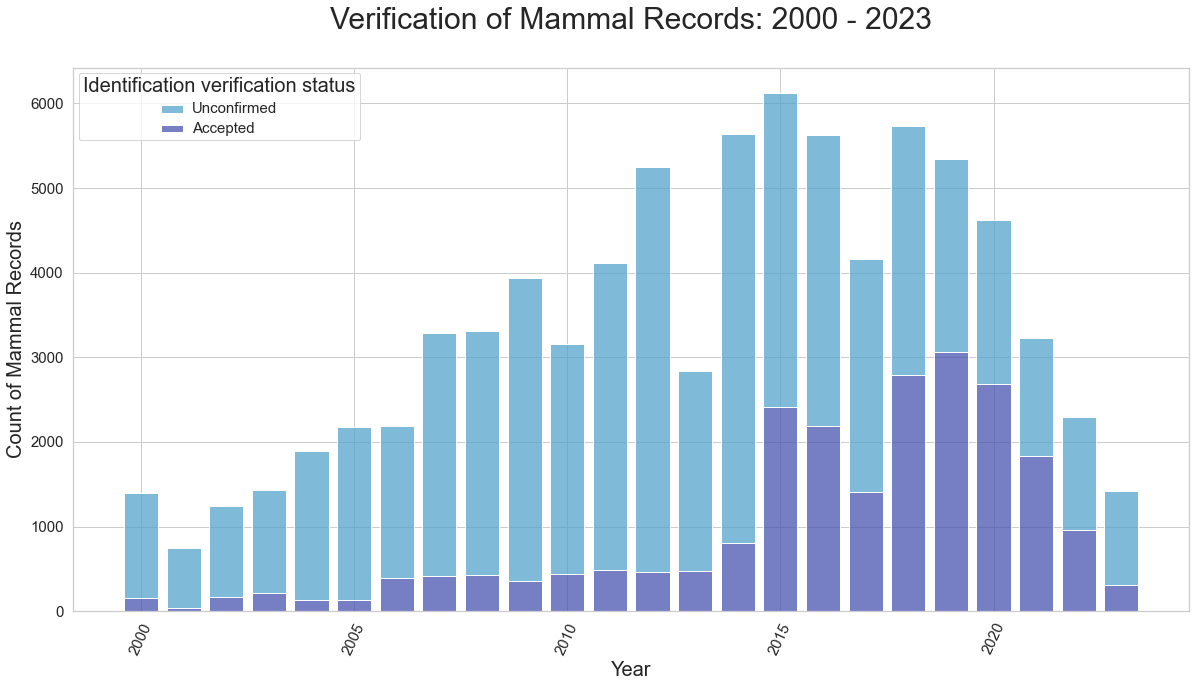

In [8]:
sns.set_theme(style='whitegrid', palette='icefire')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=mammals_df['Year'], binwidth=1,
                   hue=mammals_df['Identification verification status'], multiple = "stack", discrete=True, shrink=.8)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Count of Mammal Records", fontsize=20)
ax.set_title("Verification of Mammal Records: 2000 - 2023\n", fontsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.xticks(rotation=65, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From the above, we can determine that mammal recording has generally increased since 2000. Whilst there is an apparent decrease in recent years, this is likely due to a time lag in large volunteer groups submitting their records, or for records being digitised and added to the dataset.

Key points from this are:
* A general rise in recording (or submitting records!) since 2000.
* An increase in the proportion of <span style="color:#7662C2">**'Accepted'**</span> records from 2015, perhaps from an improvement in technology, or the implementation of a verification system.
* There appears to be little seen effect from the Covid-19 Pandemic in 2020/21.


## Who is recording? ##

There are a variety of people who submit their records - from working ecologists, to volunteers. Not everyone chooses to use their name, and so some people are recorded as an ID number. <br>

#### Here are the Top 10 Recorders between 2000 and 2023: ####

In [9]:
top10_recorders = mammals_df['Recorder'].value_counts().head(10)

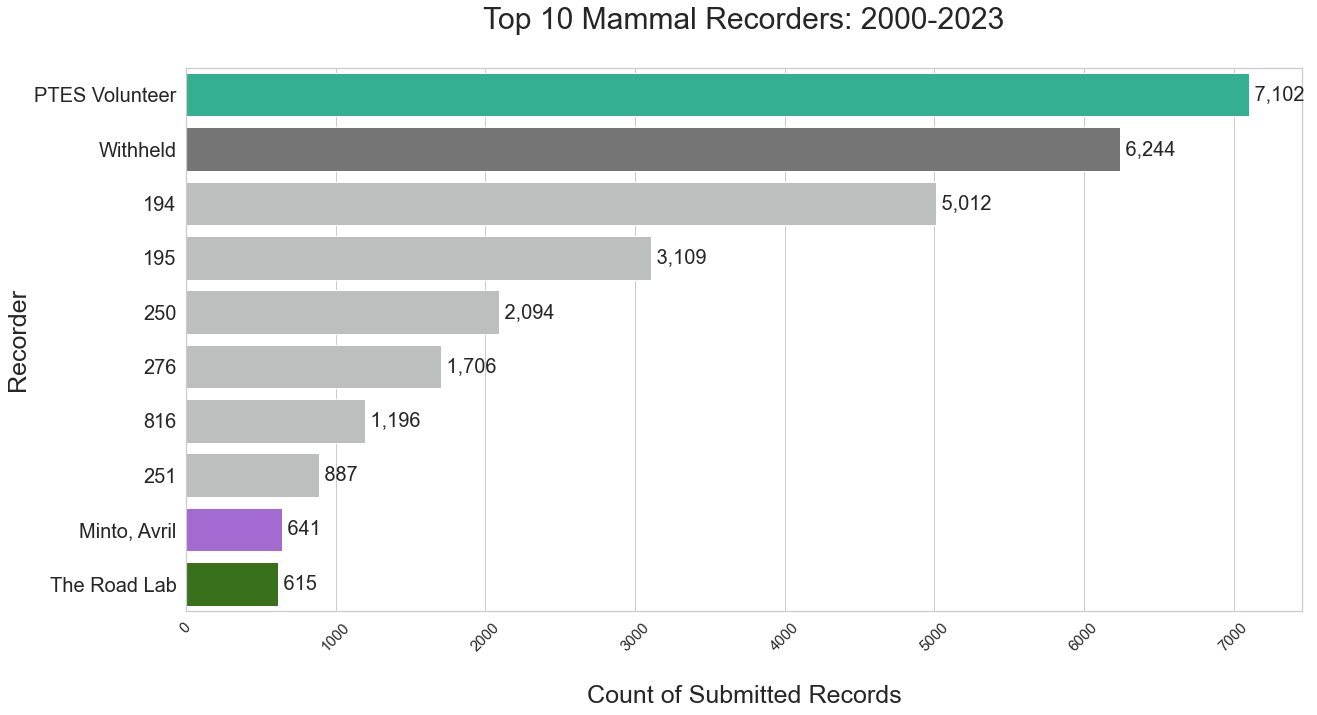

In [10]:
colors = ["#1FC49C", "#757575", "#BDBFBE", "#BDBFBE", "#BDBFBE",
         "#BDBFBE", "#BDBFBE", "#BDBFBE", "#A459E3", "#357E0E"]
sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=top10_recorders, y=top10_recorders.index)
ax.set_xlabel("\nCount of Submitted Records", fontsize=25)
ax.set_ylabel("Recorder", fontsize=25)
ax.set_title("Top 10 Mammal Recorders: 2000-2023\n", fontsize=30)
ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f} ')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

As we can see here, 6 of the top 10 Recorders have ID numbers and can't be identified to us. Many records also hold an official 'withheld' status for the recorder.

From the recorders we can identify, we must highlight the group of <span style="color:#1FC49C">**PTES Volunteers**</span>! These are volunteers collecting records for the charity, People's Trust for Endangered Species, who do a lot of conservation work for at-risk species.<br>

Another group, <span style="color:#357E0E">**The Road Lab**</span>, are a group of researchers who collect data on road kill, which they analyse to identify hotspots, which can then be used for conservation work by introducing wildlife corridors and crossings.<br>

Our best identifiable individual for mammal recording, however, is <span style="color:#A459E3">**Avril!**</span> I think she deserves a huge congratulations, and I'm sure she has many stories she could share about her recording trips! <br>


## <br> How are records gathered? ##

As the work by <span style="color:#357E0E">**The Road Lab**</span> shows, not all records are simply "I spotted an owl!" but may be evidence gathered in other ways, such as road kill, or even through machine observations. <br>

Common methods of machine observation include:
* eDNA sampling (commonly used for aquatic invertebrates, so less applicable to mammals)
* Bat detectors which detect certain sound frequencies bats use to communicate 
* Camera traps - cameras which are triggered by movement

In [11]:
mammals_df.columns

Index(['Scientific name', 'Common name', 'Taxon Rank', 'OSGR',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Recorder', 'Determiner',
       'Occurrence remarks', 'Identification verification status',
       'Basis of record', 'Data provider', 'Order', 'Family', 'Genus',
       'Vitality', 'Date', 'Year'],
      dtype='object')

In [12]:
mammals_df['Basis of record'].value_counts()

mammals_df['Vitality'].isna().value_counts()

True     71109
False    10032
Name: Vitality, dtype: int64

In [13]:
mammals_df['Basis of record'] = mammals_df['Basis of record'].replace("HumanObservation", "Human Observation")
mammals_df['Basis of record'] = mammals_df['Basis of record'].replace("MachineObservation", "Machine Observation")
mammals_df['Vitality'] = mammals_df['Vitality'].replace("alive", "Alive")
mammals_df['Vitality'] = mammals_df['Vitality'].replace("dead", "Dead")

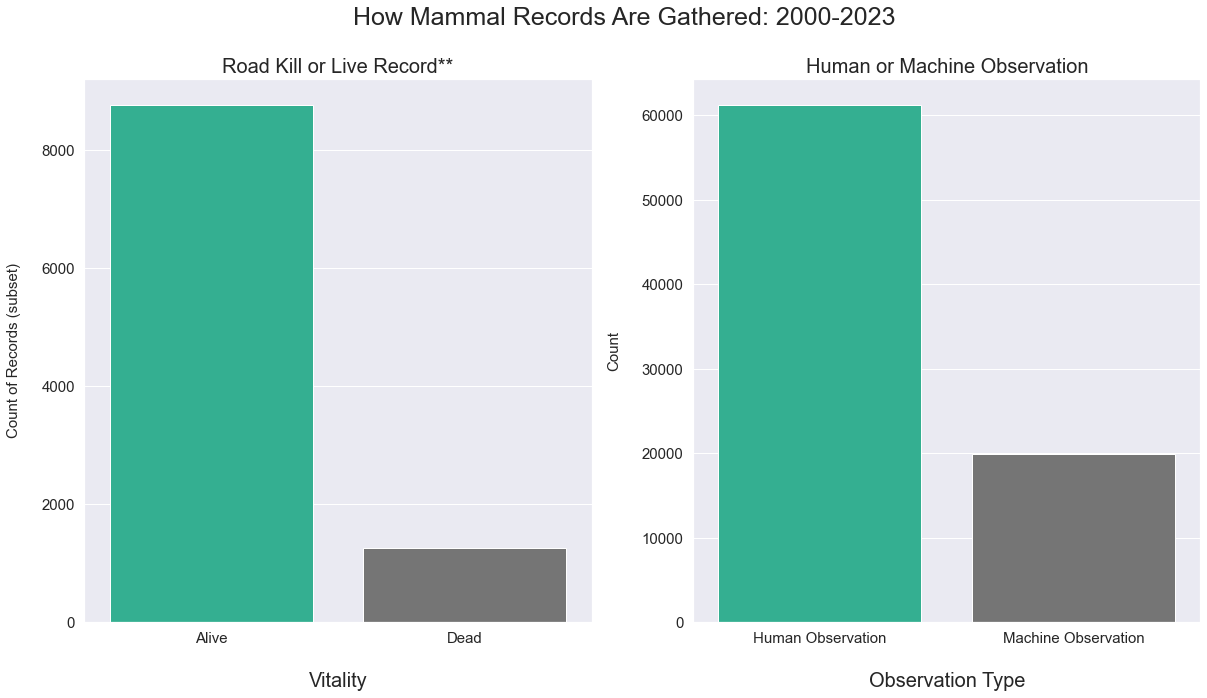

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('How Mammal Records Are Gathered: 2000-2023', fontsize=25)
sns.countplot(ax=ax[0],x=mammals_df['Vitality'])
ax[0].set_title("Road Kill or Live Record**", fontsize=20)
ax[0].set_xlabel("\nVitality", fontsize=20)
ax[0].set_ylabel("Count of Records (subset)\n", fontsize=15)
ax[0].tick_params(labelsize=15) 
sns.countplot(ax=ax[1], x=mammals_df['Basis of record'])
ax[1].set_title("Human or Machine Observation", fontsize=20)
ax[1].set_xlabel("\nObservation Type", fontsize=20)
ax[1].set_ylabel("Count\n", fontsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

** Only 10,032 records included Vitality information. 

Whilst this graph shows that x % of records were recorded by Machine Observation, it does not give us any clue as to what machine was used. Let's have a look at the species recorded by machine to help determine this.

In [15]:
top_machine_obs = mammals_df[mammals_df['Basis of record']=="Machine Observation"]['Order'].value_counts()

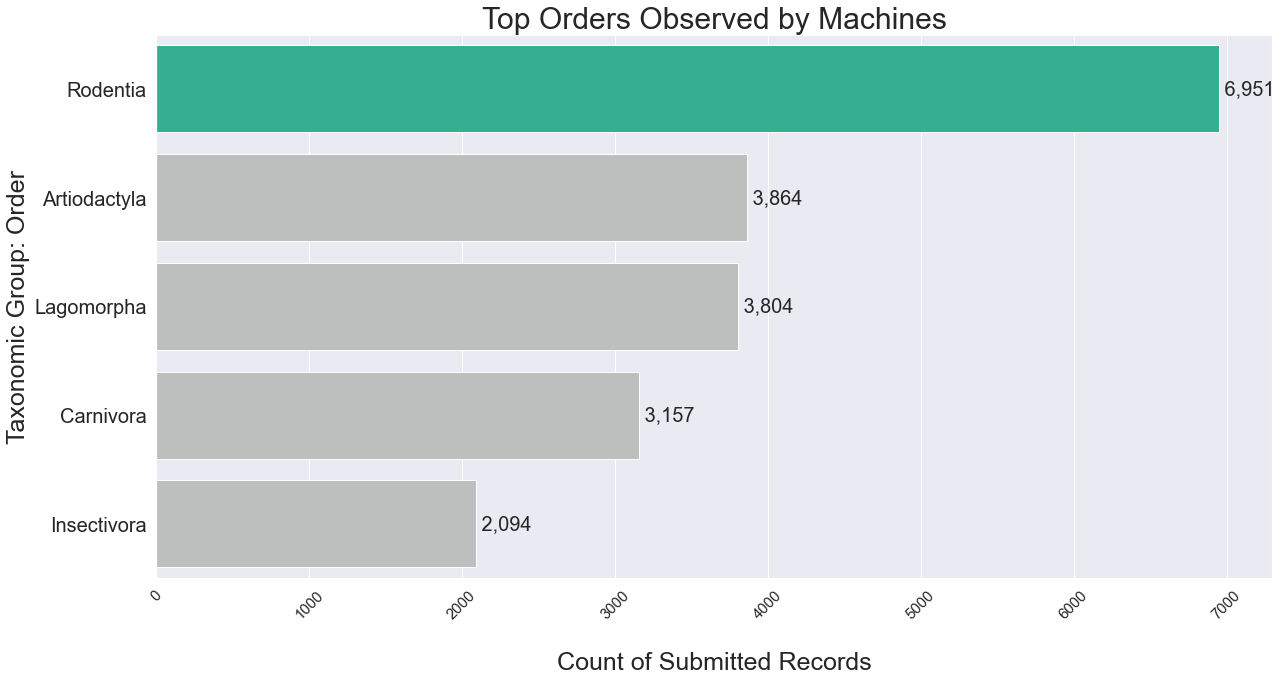

In [16]:
colors = ["#1FC49C", "#BDBFBE", "#BDBFBE", "#BDBFBE", "#BDBFBE"]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(y=top_machine_obs.index, x=top_machine_obs)
ax.set_xlabel("\nCount of Submitted Records", fontsize=25)
ax.set_ylabel("Taxonomic Group: Order", fontsize=25)
ax.set_title("Top Orders Observed by Machines", fontsize=30)
ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

The above shows that Rodentia (the Order of squirrels, mice, rats etc.) are most commonly observed by machines! Considering that bats (Chiroptera) don't even make it into the top 5, this suggests that the most common machine used is a **camera trap**.

## <br>Examining Species Bias ## 

To begin looking for any species bias, first we will examine which taxanomic Orders we have within our dataset, and which are most commonly recorded.

In [17]:
mammals_df.columns

Index(['Scientific name', 'Common name', 'Taxon Rank', 'OSGR',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Recorder', 'Determiner',
       'Occurrence remarks', 'Identification verification status',
       'Basis of record', 'Data provider', 'Order', 'Family', 'Genus',
       'Vitality', 'Date', 'Year'],
      dtype='object')

In [18]:
mammals_df['Order'].value_counts()

Rodentia           32483
Insectivora        13578
Lagomorpha         11255
Carnivora          10229
Artiodactyla        9347
Chiroptera          4131
Cetartiodactyla      117
Diprotodontia          1
Name: Order, dtype: int64

In [19]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}K".format(int(x / 1000)) for x in ax.get_xticks()[:-1]]
    )

In [20]:
def add_bar_icons(ax, row, background_color, zoom, pad):
    for index, (name, value) in enumerate(row.items()): 
        icon = plt.imread("icons/{}.jpeg".format(name))
        image = OffsetImage(icon, zoom=zoom, interpolation="lanczos", resample=True, visible=True)
        image.image.axes = ax

        ax.add_artist(AnnotationBbox(
            image, (value, index), frameon=True,
            xycoords="data",
            bboxprops={
                "facecolor": "#fff",
                "linewidth": 2.5,
                "edgecolor": background_color,
                "boxstyle": "circle, pad={}".format(pad),
            }
        ))

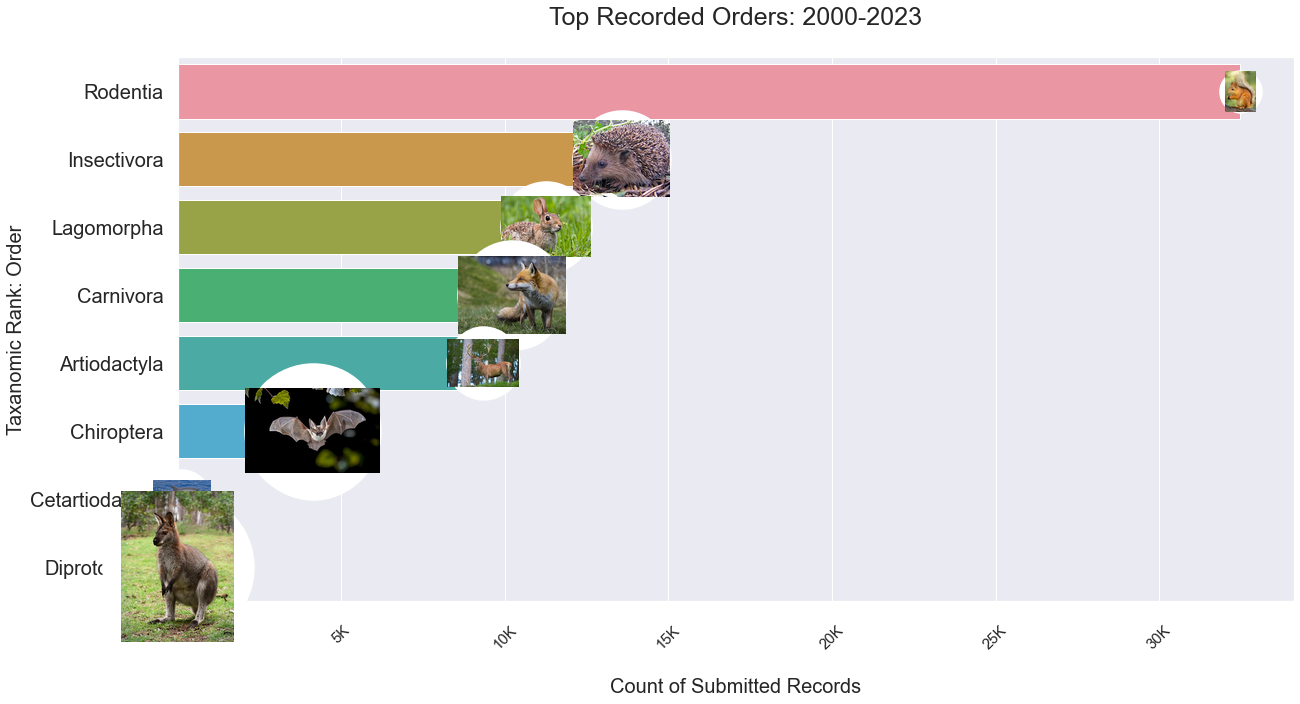

In [21]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(y=mammals_df['Order'], order=mammals_df['Order'].value_counts().index)
ax.set_xlabel("\nCount of Submitted Records", fontsize=20)
ax.set_ylabel("Taxanomic Rank: Order", fontsize=20)
ax.set_title("Top Recorded Orders: 2000-2023\n", fontsize=25)
#ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f}')
format_axes(ax)
add_bar_icons(ax, mammals_df['Order'].value_counts(), background_color='white', zoom=0.09, pad=0)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

### Taxonomic Orders ###

The most common taxonomic order is the Rodentia (rodents), which is expected as they include some of the most common species such as rats, mice, and squirrels. They make up **40%** of all records in this time period.

Other Orders found are:
* Insectivora - Hedgehogs, shrews & moles
* Lagomorpha - Rabbits & hares
* Carnivora - Carnivores (otters, badgers, weasels, etc.)
* Artiodactyla - Ungulates (even-toed hoofed animals - deer)
* Chiroptera - Bats
* Cetartiodactyla - Aquatic mammals (dolphins, whales)
* Diprotodontia - Marsupials... (Kangaroos, wallabies...)

**Wait!** Kangaroos and wallabies in the UK? That doesn't sound right...

In [22]:
mammals_df[mammals_df['Order']=='Diprotodontia']

,Scientific name,Common name,Taxon Rank,OSGR,Latitude (WGS84),Longitude (WGS84),Recorder,Determiner,Occurrence remarks,Identification verification status,Basis of record,Data provider,Order,Family,Genus,Vitality,Date,Year
8121,Macropus rufogriseus,Red-necked Wallaby,species,NU2109,55.379012,-1.662251,"Kirby, Melvyn","Kirby, Melvyn",NaN,Accepted,Human Observation,Mammal Society,Diprotodontia,Macropodidae,Macropus,NaN,2018-06-23,2018


Well look at that, a record for a Red-necked Wallaby, and an Accepted record at that! Upon further investigation, there are some populations of these wallabies in the UK - who knew!

((IMAGE OF WALLABY??))


Within the 8 Orders above, our data can be further broken down to:
* 21 unique families
* 47 unique Genus
* 85 unique species

## To Species Level: 85 Unique Species ##

There are 85 unique species in the dataset. Here are the top 10!

In [23]:
mammals_df.groupby('Order')['Common name'].value_counts().nlargest(10)

Order         Common name           
Rodentia      Eastern Grey Squirrel     16776
              Eurasian Red Squirrel     11858
Insectivora   West European Hedgehog    10698
Artiodactyla  Roe Deer                   8975
Lagomorpha    European Rabbit            7329
Carnivora     Red Fox                    4235
Lagomorpha    Brown Hare                 3918
Carnivora     Eurasian Badger            2322
Insectivora   European Mole              1804
Carnivora     Eurasian Otter             1643
Name: Common name, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: 'icons/Eastern Grey Squirrel.jpeg'

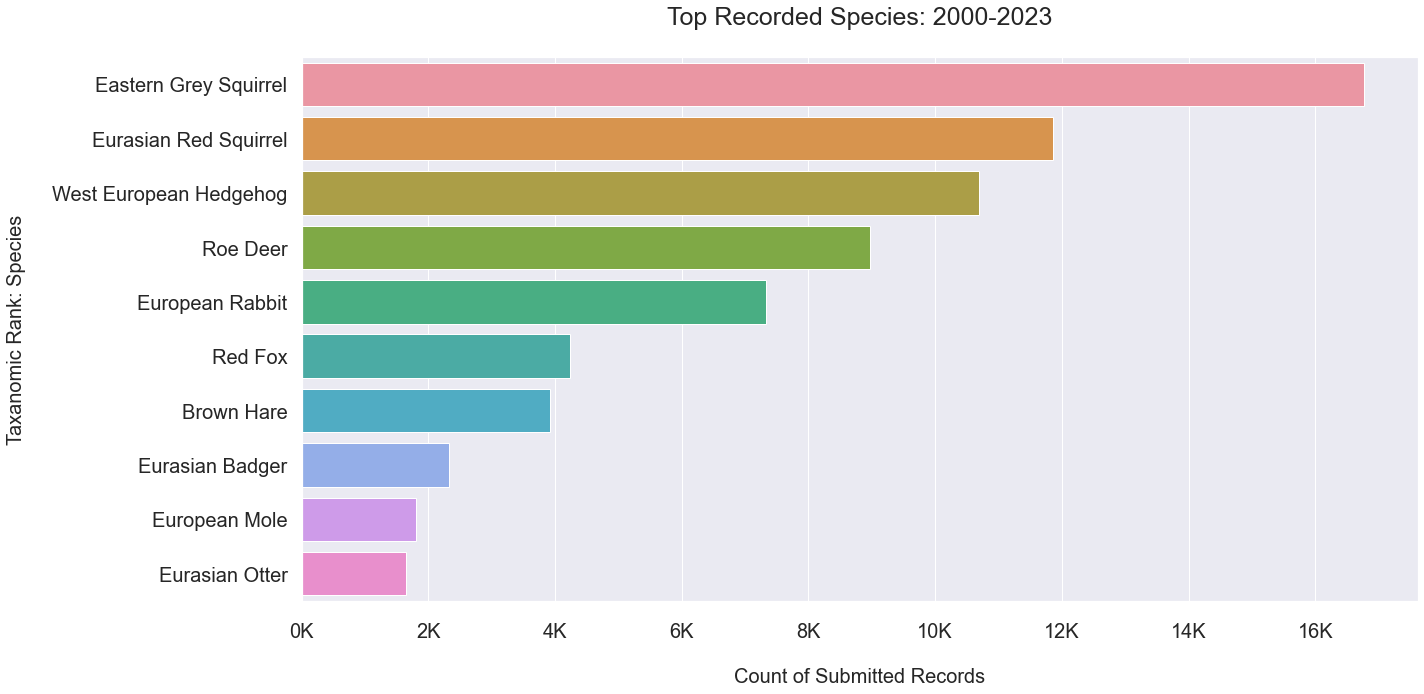

In [24]:
sns.color_palette("rainbow")
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=mammals_df['Common name'].value_counts().nlargest(10), 
                 y=mammals_df['Common name'].value_counts().nlargest(10).index)
ax.set_xlabel("\nCount of Submitted Records", fontsize=20)
ax.set_ylabel("Taxanomic Rank: Species\n", fontsize=20)
ax.set_title("Top Recorded Species: 2000-2023\n", fontsize=25)
#ax.bar_label(ax.containers[0], fontsize=20, fmt='{:,.0f}')
format_axes(ax)
add_bar_icons(ax, mammals_df['Common name'].value_counts(), background_color='white', zoom=0.09, pad=0)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

# TO DO #
* Find a nicer colour scheme - highlight the 2 squirrels and leave the others?
* Better grid ??

## Challenge: ##
* Add 'icons' to each bar??

Key Points:
* Whilst rodents are top, we'd expect more mice or rats in here and see only squirrels. This suggests a bias against the other common rodents which are missing from here.
* All of these species are relatively cute, rare, or exciting, suggesting that people may be more likely to record them. 


# Species Level By Order #

Select a taxanomic Order to view the record counts to species level. This is useful for seeing a different level of detail, and further examining bias, particularly within the Rodentia order.

In [62]:
sns.color_palette("rainbow")
order = mammals_df.Order.unique()
@interact(Order = order)
def f(Order):      
    df2 = mammals_df[mammals_df['Order'].str.contains(Order)]
    fig, ax = plt.subplots(figsize=(20,10))
    ax=sns.countplot(y="Common name", data=df2, order=df2['Common name'].value_counts().index)
    ax.set_title("Top Species per Order: 2000-2023\n", fontsize=25)
    ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f}')
    ax.set_xlabel("Count of records", fontsize=25)
    ax.tick_params(labelsize=20)
    ax.set_ylabel("Common name", fontsize=25)
    return plt.show()


interactive(children=(Dropdown(description='Order', options=('Rodentia', 'Carnivora', 'Lagomorpha', 'Insectivo…

# Geographical Data Bias #

#### Is there a geographical bias towards either populated areas or nature reserves? ####

To examine this well, we need to remove sensitive species as they are purposefully given 'noise' to protect them.

In [20]:
sensitive_sp = pd.read_csv("data/sensitive_sp.csv")

In [21]:
mammal_unique = list(mammals_df['Scientific name'].unique())

In [22]:
sensitive_mam = [i for i in mammal_unique if i in list(sensitive_sp['scientificName'])]

#### The senistive mammal species have been identified as the following list (in scientific name). ####

In [23]:
sensitive_mam

['Lutra lutra',
 'Phocoena phocoena',
 'Halichoerus grypus',
 'Meles meles',
 'Delphinus delphis',
 'Tursiops truncatus',
 'Phoca vitulina',
 'Martes martes',
 'Lagenorhynchus albirostris',
 'Balaenoptera acutorostrata',
 'Muscardinus avellanarius',
 'Stenella coeruleoalba',
 'Castor fiber']

In [24]:
mammal_no_sens = mammals_df[~mammals_df['Scientific name'].isin(sensitive_mam)]

In [25]:
mammal_no_sens.shape

(76506, 18)

Now, we can view the remaining **76,506** records on a heatmap to examine geographical data biases.

In [26]:
import folium
from folium.plugins import HeatMap
lat = mammal_no_sens['Latitude (WGS84)'].median()
lon = mammal_no_sens['Longitude (WGS84)'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="openstreetmap")
folium_hmap.add_child(
    HeatMap(mammal_no_sens[['Latitude (WGS84)', 'Longitude (WGS84)']], radius=30, min_opacity=0.2, blur=30))

#### The above map has identified a few hotspots: ####
* Around more heavily populated areas of Durham, Newcastle, Hexham
* A Particular hotspot around Arcot Pond SSSI - a Site of Special Scientific Interest (nationally identified as an important site) - **however** this is very central, and could be some 'noise' in the data with high-level grid references leading to these coordinates - let's remove records with short grid reference of less than 4 length (removing anything which references an area more than 1km)

In [27]:
mammal_finer_OSGR = mammal_no_sens[mammal_no_sens['OSGR'].str.len()>4]

In [28]:
import folium
from folium.plugins import HeatMap
lat = mammal_finer_OSGR['Latitude (WGS84)'].median()
lon = mammal_finer_OSGR['Longitude (WGS84)'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="openstreetmap")
folium_hmap.add_child(
    HeatMap(mammal_finer_OSGR[['Latitude (WGS84)', 'Longitude (WGS84)']], radius=30, min_opacity=0.2, blur=30))

#### The newer map has improved our data visualisation: ####
* The hotspot around Arcot Pond has drastically reduced.
* More realistic hotspots are now more visible.
* One hotspot is in Brancepeth, a very nature-friendly looking area.
* Another hotspot includes Rainton Meadows, a nature reserve.

From this, we can conclude that there is a slight bias towards nature-friendly areas and nature reserves, however at least for mammal recording, it is not to the extreme that may have been expected.

# Main Conclusions #

1. Mammal recording has increased since 2000, with a higher proportion of records being 'accepted'.
2. Most records are collected by Human Observation, and often by volunteers or researchers.
3. Squirrels are the most commonly recorded species in the North East!
4. A species-recording bias is likely present, with fewer records of common 'vermin' species recorded, and more charismatic species recorded, than expected.
5. A geographical bias may be present but is unclear and not as striking as was expected. 


### Future Exploration ###
There is scope within the dataset for even more observation in the future, including:
* What key words appear in the observation comments?
* How are the record counts for these species changing over time?
* Do the same recorders always record the same species? 
* How do these findings compare with exploration on other species groups? (E.g. birds, insects)